In [389]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv('experiment_logbook_architecture_20.csv')
df2 = pd.read_csv('experiment_logbook_architecture_20_200-400.csv')
df3 = pd.read_csv('experiment_logbook_architecture_20_400-600.csv')
df4 = pd.read_csv('experiment_logbook_architecture_20_600-800.csv')
df5 = pd.read_csv('experiment_logbook_architecture_20_800-1000.csv')
df6 = pd.read_csv('experiment_logbook_architecture_20_1000-1200.csv')


df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)
# Display the DataFrame
print(df.columns)


Index(['achitecture', 'best_epoch', 'best_val', 'best_train', 'training_loss',
       'validation_loss'],
      dtype='object')


In [390]:
import numpy as np
import itertools

def params_2(hidden_size_list): 
    params = 0
    for layer in range(len(hidden_size_list)+1):
        if layer == 0:
            params += 321*hidden_size_list[layer] + hidden_size_list[layer]
        elif layer == len(hidden_size_list):
            params += hidden_size_list[layer-1]*7+7
        else: 
            params += hidden_size_list[layer]*hidden_size_list[layer]+hidden_size_list[layer]
            
    return params

total_train_samples = 1800000
params_ub = 1900000 // 9
params_lb = 1900000 // 11


layers = np.arange(3, 7)
units = [32,64,128,256,512]

valid_architecture = []
for layer in layers:
    # print(layer)
    combinations = list(itertools.product(units, repeat=layer))
    for comb in combinations:
        if params_2(comb) <= params_ub and params_2(comb) >= params_lb:
            valid_architecture.append(comb)
print(len(valid_architecture))

1157


In [391]:
1900000 // 9

211111

In [392]:
df['achitecture'].unique().shape

(1157,)

In [393]:
import ast

trains = []
vals = []

for i in range(len(df)):
    vals.append(ast.literal_eval(df['validation_loss'][i]))
    trains.append(ast.literal_eval(df['training_loss'][i]))

vals = np.array(vals)
trains = np.array(trains)

vals.shape, trains.shape

((1157, 20), (1157, 20))

In [394]:
architectures = df['achitecture'].values
best_epochs = df['best_epoch'].values
best_trains = df['best_train'].values
best_vals = df['best_val'].values

architectures.shape, best_epochs.shape, best_trains.shape, best_vals.shape

((1157,), (1157,), (1157,), (1157,))

### base on best train or vals

In [395]:
best_on_val= np.argmin(best_vals)
best_on_train = np.argmin(best_trains)
architectures[best_on_train], architectures[best_on_val]

('(128, 256, 128, 256, 128, 64)', '(128, 256, 128, 32, 128, 256)')

In [396]:
ub = best_trains[best_on_train] + 0.05 * best_trains[best_on_train]
lb = best_trains[best_on_train] - 0.05 * best_trains[best_on_train]
close_match_indexes = np.where((best_trains > lb) & (best_trains < ub))[0]
close_match_indexes

array([ 94, 439, 607, 608, 614, 685, 691, 875])

In [397]:
architectures[best_on_train]

'(128, 256, 128, 256, 128, 64)'

In [398]:
architectures[close_match_indexes]

array(['(128, 128, 256, 256, 32)', '(64, 256, 128, 128, 256, 64)',
       '(128, 128, 256, 128, 256, 64)', '(128, 128, 256, 256, 32, 32)',
       '(128, 128, 256, 256, 128, 32)', '(128, 256, 128, 256, 32, 64)',
       '(128, 256, 128, 256, 128, 64)', '(256, 128, 64, 256, 128, 128)'],
      dtype=object)

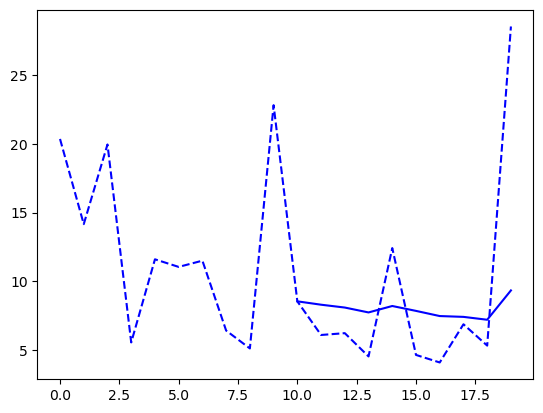

In [399]:
import matplotlib.pyplot as plt
sample = 240
plt.plot(np.arange(10,20), vals_ema[sample], color='blue')
plt.plot(vals[sample], color='blue', linestyle='dashed')
# plt.ylim(5, 10)

In [412]:
trains.shape

(1157, 20)

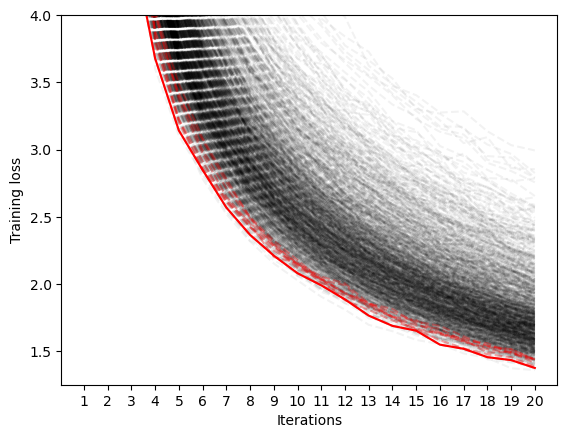

In [444]:
import matplotlib.pyplot as plt
# for i in close_match_indexes:
for i in range(1157):
    plt.plot(trains[i], color='black', linestyle='dashed', alpha=0.05)
    # plt.plot(vals[i], color='blue', linestyle='dashed', alpha=0.1)
for i in close_match_indexes:
    plt.plot(trains[i], color='red', linestyle='dashed', alpha=0.3)
# sample = 123
plt.plot(trains[best_on_train], color='red')
# plt.plot(vals[best_on_train], color='blue')
plt.ylim(1.25, 4)


x_tick_positions = np.linspace(0, 19, 20)  # Adjust the range and number of ticks as needed
x_tick_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
plt.xticks(x_tick_positions, x_tick_labels)

plt.xlabel('Iterations')
plt.ylabel('Training loss')
# plt.legend()

# Show the plot
plt.show()


### smooth all trains and vals

In [137]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]  # Initial EMA value is the first data point
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema


In [230]:
trains_ema = []
vals_ema = []
for sample in range(len(architectures)):
    vals_ema.append(exponential_moving_average(vals[sample][10:], 0.1))
    trains_ema.append(exponential_moving_average(trains[sample][10:], 0.9))

vals_ema = np.array(vals_ema)
trains_ema = np.array(trains_ema)

In [235]:
np.arange(11,21)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

(0.0, 10.0)

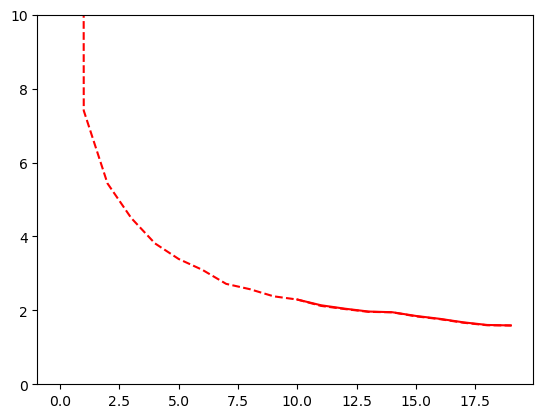

In [236]:
import matplotlib.pyplot as plt
sample = 580
plt.plot(np.arange(10,20), trains_ema[sample], color='red')
plt.plot(trains[sample], color='red', linestyle='dashed')
plt.ylim(0, 10)

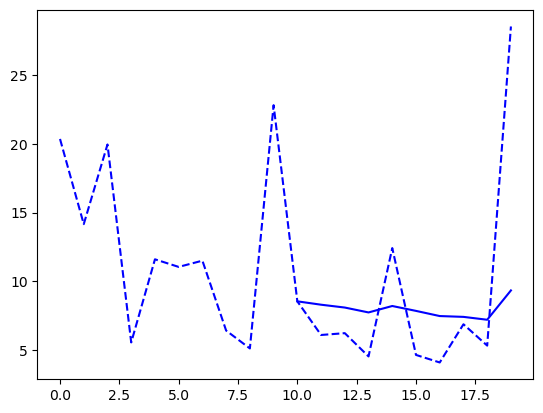

In [238]:
import matplotlib.pyplot as plt
sample = 240
plt.plot(np.arange(10,20), vals_ema[sample], color='blue')
plt.plot(vals[sample], color='blue', linestyle='dashed')
# plt.ylim(5, 10)

In [78]:
alpha = 0.1  # Adjust the decay rate as needed
weights = np.exp(-alpha * np.arange(len(X)))
weights

array([1.        , 0.90483742, 0.81873075, 0.74081822, 0.67032005,
       0.60653066, 0.54881164, 0.4965853 , 0.44932896])


### Weighted Linear Regression

In [80]:
import numpy as np
from scipy.optimize import minimize

def weighted_least_squares(x, y, weights):
    """
    Perform weighted linear regression using least squares optimization.

    Parameters:
    - x: 1D array of predictor variable values
    - y: 1D array of response variable values
    - weights: 1D array of weights for each observation

    Returns:
    - beta: Array containing the estimated regression coefficients [beta0, beta1]
    """

    # Define the loss function to be minimized
    def loss_function(beta):
        beta0, beta1 = beta
        y_pred = beta0 + beta1 * x
        residuals = y - y_pred
        weighted_residuals = weights * residuals
        return np.sum(weighted_residuals**2)

    # Initial guess for regression coefficients
    initial_guess = [0, 0]

    # Minimize the loss function using scipy.optimize.minimize
    result = minimize(loss_function, initial_guess)

    return result.x

# # Example data
# x = np.arange(1, 21)
# y = vals[sample]
# weights = x
# # weights = 0.5 ** x[::-1]

# # Perform weighted linear regression
# beta = weighted_least_squares(x, y, weights)

# # Print the estimated regression coefficients
# print("Estimated coefficients (beta0, beta1):", beta)


Estimated coefficients (beta0, beta1): [ 7.7892664  -0.08823441]


In [162]:
x = np.arange(1, 21)
# weights = x
weights = 0.9 ** x[::-1]
weights[:10] = 0
betas_train = []
betas_val = []
for sample in range(len(architectures)): 
    y_traning = trains[sample]
    y_val = vals[sample]
    betas_train.append(weighted_least_squares(x, y_traning, weights))
    betas_val.append(weighted_least_squares(x, y_val, weights))

In [163]:
betas_train = np.array(betas_train)
betas_val = np.array(betas_val)

beta0s_train = betas_train[:, 0]
beta1s_train = betas_train[:, 1]
beta0s_val = betas_val[:, 0]
beta1s_val = betas_val[:, 1]

In [164]:
predictions_train = beta0s_train + beta1s_train * 300
predictions_val = beta0s_val + beta1s_val * 300

In [166]:
ind_best_train = np.argmin(predictions_train) 
ind_best_val = np.argmin(predictions_val)
ind_best_train, ind_best_val

(1, 778)

(0.0, 10.0)

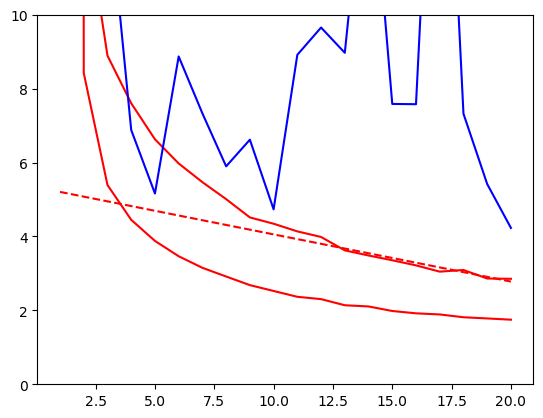

In [203]:
# best based on training loss

plt.plot(x, trains[ind_best_train], color='red')
plt.plot(x, trains[ind_best_train+134], color='red')
plt.plot(x, beta0s_train[ind_best_train] + beta1s_train[ind_best_train] * x, color='red', linestyle='dashed')
plt.plot(x, vals[ind_best_train], color='blue')
plt.ylim(0, 10)

(0.0, 10.0)

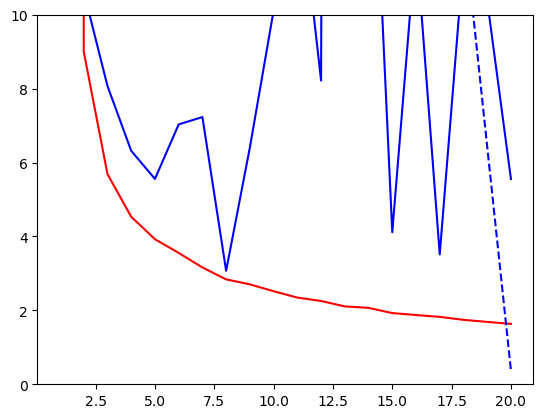

In [204]:
# best based on val loss

plt.plot(x, trains[ind_best_val], color='red')
plt.plot(x, beta0s_val[ind_best_val] + beta1s_val[ind_best_val] * x, color='blue', linestyle='dashed')
plt.plot(x, vals[ind_best_val], color='blue')
plt.ylim(0, 10)

In [184]:
sample = ind_best_val-6
val_emas = exponential_moving_average(vals[sample], 0.1)

vals[sample], val_emas

(array([23.52877675,  7.28117263,  8.71453602,  8.46579912, 13.98657229,
         5.40820483,  9.10094919, 14.26507074,  8.82997158,  5.91193374,
         7.10525851,  8.8098709 , 11.89264506,  6.76648259,  5.80283067,
         9.70725523,  6.053757  ,  3.15142266,  9.09930546,  5.09386329]),
 [23.528776752705475,
  21.90401634002218,
  20.58506830799336,
  19.373141388951513,
  18.834484478565138,
  17.49185651399418,
  16.652765781604845,
  16.41399627745011,
  15.655593807327456,
  14.681227800430527,
  13.923630871734485,
  13.412254875041608,
  13.26029389327413,
  12.610912763109619,
  11.93010455397641,
  11.707819621301287,
  11.14241335926542,
  10.34331428921339,
  10.218913406721743,
  9.706408394824626])

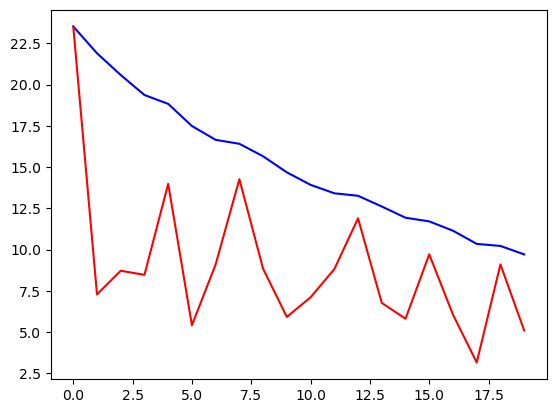

In [185]:
import matplotlib.pyplot as plt
plt.plot(val_emas, color='blue')
plt.plot(vals[sample], color='red')
# plt.ylim(5, 10)

In [119]:
def exponential_smoothing(series, alpha):
    """
    Compute exponential smoothing of given series.

    Parameters:
    - series: A pandas Series representing the time series data.
    - alpha: Smoothing factor (0 < alpha < 1).

    Returns:
    - smoothed_series: A pandas Series containing the exponentially smoothed values.
    """
    smoothed_series = []
    smoothed_series.append(series[0])  # Initialize with the first observed value

    for t in range(1, len(series)):
        smoothed_series.append(alpha * series[t] + (1 - alpha) * smoothed_series[t - 1])

    return np.array(smoothed_series)

In [122]:
exp_val = exponential_smoothing(vals[2], 0.1)

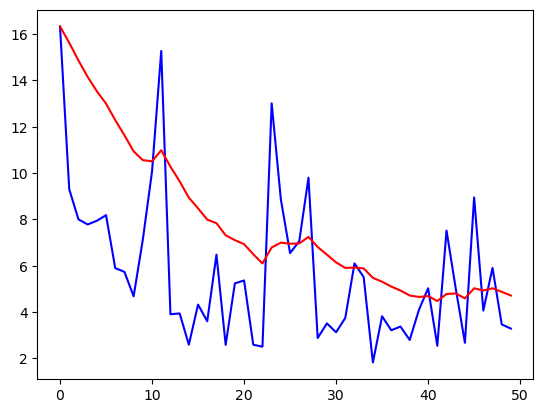

In [123]:
plt.plot(vals[2], color='blue')
plt.plot(exp_val, color='red')

### Final results from tuned architectures

In [447]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv('architecture_tuned_models_graham.csv')
df2 = pd.read_csv('architecture_tuned_models_narval.csv')

df = pd.concat([df1, df2], axis=0)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)
# Display the DataFrame
print(df.columns)


Index(['achitecture', 'best_epoch', 'best_val', 'best_train', 'training_loss',
       'validation_loss'],
      dtype='object')


In [448]:
achitectures = df['achitecture'].values
best_epochs = df['best_epoch'].values
best_trains = df['best_train'].values
best_vals = df['best_val'].values

In [449]:
achitectures

array(['(256, 128, 64, 256, 128, 128)', '(128, 256, 128, 256, 128, 64)',
       '(128, 256, 128, 256, 32, 64)', '(128, 128, 256, 256, 32, 32)',
       '(128, 128, 256, 128, 256, 64)', '(128, 128, 256, 256, 128, 32)',
       '(128, 128, 256, 256, 32)', '(64, 256, 128, 128, 256, 64)'],
      dtype=object)

In [450]:
achitectures[np.argmin(best_trains)]

'(128, 128, 256, 128, 256, 64)'

In [451]:
np.argmin(best_trains)

4

In [452]:
best_vals[np.argmin(best_trains)], best_trains[np.argmin(best_trains)]

(0.9854830783240648, 0.4740829834284364)

In [382]:
best_vals[np.argmin(best_vals)], best_trains[np.argmin(best_vals)]

(0.7056272510363131, 0.4912503761778648)

In [383]:
achitectures[np.argmin(best_vals)], best_epochs[np.argmin(best_vals)]

('(128, 128, 256, 256, 32)', 276)

In [384]:
import ast

training_losses = []
validation_losses = []

for i in range(len(df)):
    training_losses.append(ast.literal_eval(df['training_loss'][i]))
    validation_losses.append(ast.literal_eval(df['validation_loss'][i]))

validation_losses = np.array(validation_losses)
training_losses = np.array(training_losses)

validation_losses.shape, training_losses.shape

((8, 300), (8, 300))

In [453]:
validation_losses[np.argmin(best_vals)]

array([7.82452716e+02, 2.19388459e+01, 9.62816816e+00, 1.26584974e+01,
       5.41419778e+00, 8.27479668e+00, 9.00948727e+00, 2.07132144e+00,
       7.97959742e+00, 7.07241824e+00, 3.53984678e+00, 2.82541259e+01,
       5.19706659e+00, 3.21241088e+00, 5.01048427e+00, 1.33812234e+01,
       1.05031146e+01, 1.25832272e+01, 7.85889337e+00, 6.31926864e+00,
       4.53502652e+00, 1.01053587e+01, 3.71151061e+00, 4.40123276e+00,
       7.21561846e+00, 4.60629645e+00, 1.36717325e+01, 7.47428327e+00,
       6.22350501e+00, 1.28604117e+01, 5.92691245e+00, 2.79447601e+00,
       1.08802970e+01, 1.27872053e+01, 1.69957036e+00, 2.28188229e+00,
       1.09835402e+01, 8.14813683e+00, 5.24981704e+00, 8.09825971e+00,
       3.30322160e+00, 4.87903502e+00, 3.28323709e+00, 1.35568229e+00,
       5.15512698e+00, 6.00422325e+00, 2.17330004e+00, 7.04325253e+00,
       9.41202773e+00, 2.75912290e+00, 2.26339065e+00, 3.34527241e+00,
       7.29364171e+00, 6.70116331e+00, 9.17936273e+00, 3.09522512e+00,
      

(0.0, 50.0)

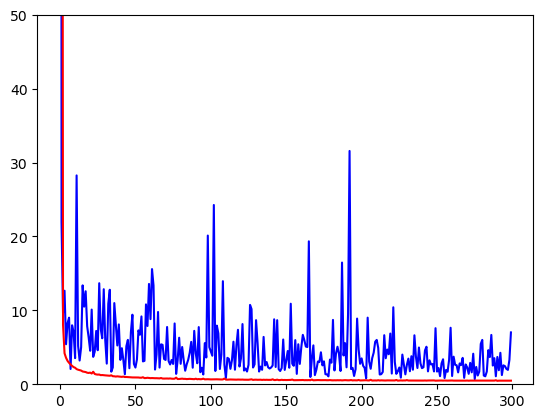

In [385]:
ind = np.argmin(best_vals)

import matplotlib.pyplot as plt
plt.plot(validation_losses[ind], color='blue')
plt.plot(training_losses[ind], color='red')
plt.ylim(0, 50)
# plt.xlim(0, 20)